<a href="https://colab.research.google.com/github/manishramamoorthy/New-Machine-Learning-Projects/blob/main/Project_4_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Summary :**

1) Importing Libraries                         
2) Loading Dataset                         
3) Data PreProcessing                               
4) EDA (Exploratory Data Analysis)                             
5) Train and Test Split                             
6) Standard Scaler                      
7) Modelling                            
8) Making Prediction                           
9) Compare Actual and Predicted Scores                        
10) Evaluation Metrics                               

**1) Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

**2) Loading Dataset**

In [2]:
car_price_data = pd.read_csv("/content/car data (1).csv")

**3) Data PreProcessing**

1) Top Five Rows of DataSet

In [4]:
car_price_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


2) Last Five Rows of DataSet

In [5]:
car_price_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


3) Shape of DataSet

In [6]:
car_price_data.shape
print("Number of Rows: ",car_price_data.shape[0])
print("Number of Columns: ",car_price_data.shape[1])

Number of Rows:  301
Number of Columns:  9


4) data Types

In [7]:
car_price_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

5) Getting Information of DataSet

In [8]:
car_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


6) Checking Missing Values of DataSet

In [9]:
car_price_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

7) Droping Duplicates Values of Dataset

In [10]:
car_price_data = car_price_data.drop_duplicates()

8) Data Encoding                  

    

checking the distribution of categorical data

In [11]:
car_price_data.Fuel_Type.value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [12]:
car_price_data.Seller_Type.value_counts()

Dealer        193
Individual    106
Name: Seller_Type, dtype: int64

In [13]:
car_price_data.Transmission.value_counts()

Manual       260
Automatic     39
Name: Transmission, dtype: int64

Encoding Categorical Values To Numerical Values

In [14]:
car_price_data["Fuel_Type"] = car_price_data["Fuel_Type"].map({"Petrol":1,"Diesel":2,"CNG":3}) 

In [15]:
car_price_data["Seller_Type"] = car_price_data["Seller_Type"].map({"Dealer":1,"Individual":2}) 

In [16]:
car_price_data["Transmission"] = car_price_data["Transmission"].map({"Manual":1,"Automatic":2}) 

9) Statistical Measures

In [17]:
car_price_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,1.207358,1.354515,1.130435,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.422297,0.479168,0.337346,0.248720
min,2003.000000,0.100000,0.320000,500.000000,1.000000,1.000000,1.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,1.000000,1.000000,1.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,1.000000,1.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,1.000000,2.000000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,2.000000,2.000000,3.000000


10) IQR (Inter Quantile Range)
  
    IQR = Q3-Q1           
    Upper Threshold = Q3 + (1.5 * IQR)
    Lower Threshold = Q1 - (1.5 * IQR)   

Year

In [18]:
IQR = car_price_data.Year.quantile(0.75) - car_price_data.Year.quantile(0.25)
Upper_Threshold = car_price_data.Year.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = car_price_data.Year.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  2022.0
Lower_Threshold :  2006.0


Present_Price

In [19]:
IQR = car_price_data.Present_Price.quantile(0.75) - car_price_data.Present_Price.quantile(0.25)
Upper_Threshold = car_price_data.Present_Price.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = car_price_data.Present_Price.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  22.8
Lower_Threshold :  -11.760000000000002


Kms_Driven	

In [20]:
IQR = car_price_data.Kms_Driven.quantile(0.75) - car_price_data.Kms_Driven.quantile(0.25)
Upper_Threshold = car_price_data.Kms_Driven.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = car_price_data.Kms_Driven.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  99708.75
Lower_Threshold :  -35825.25


In [21]:
car_price_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,2,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,2,1,1,0


**4) EDA (Exploratory Data Analysis)**

Year VS Selling_Price

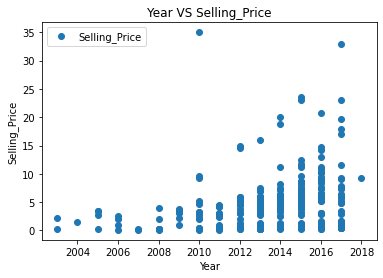

In [22]:
car_price_data.plot(x="Year",y="Selling_Price",style="o")
plt.title("Year VS Selling_Price")
plt.xlabel("Year")
plt.ylabel("Selling_Price")
plt.show()

In [23]:
car_price_data[["Year","Selling_Price"]].corr()

,Year,Selling_Price
Year,1.000000,0.234369
Selling_Price,0.234369,1.000000


Present_Price VS Selling_Price

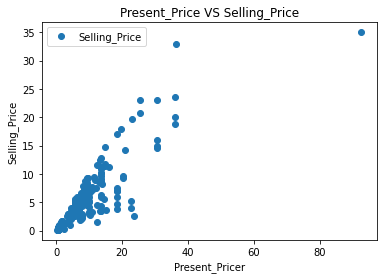

In [24]:
car_price_data.plot(x="Present_Price",y="Selling_Price",style="o")
plt.title("Present_Price VS Selling_Price")
plt.xlabel("Present_Pricer")
plt.ylabel("Selling_Price")
plt.show()

In [25]:
car_price_data[["Present_Price","Selling_Price"]].corr()

,Present_Price,Selling_Price
Present_Price,1.000000,0.876378
Selling_Price,0.876378,1.000000


Kms_Driven VS Selling_Price

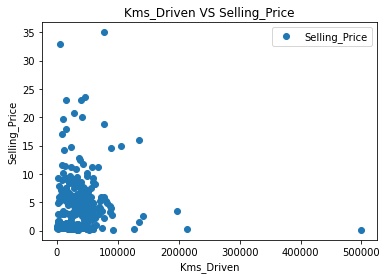

In [26]:
car_price_data.plot(x="Kms_Driven",y="Selling_Price",style="o")
plt.title("Kms_Driven VS Selling_Price")
plt.xlabel("Kms_Driven")
plt.ylabel("Selling_Price")
plt.show()

In [27]:
car_price_data[["Kms_Driven","Selling_Price"]].corr()

,Kms_Driven,Selling_Price
Kms_Driven,1.000000,0.028566
Selling_Price,0.028566,1.000000


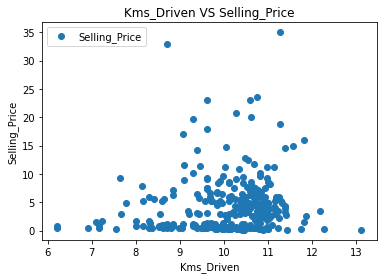

In [28]:
car_price_data["Transformed"] = np.log(car_price_data["Kms_Driven"])
car_price_data.plot(x="Transformed",y="Selling_Price",style="o")
plt.title("Kms_Driven VS Selling_Price")
plt.xlabel("Kms_Driven")
plt.ylabel("Selling_Price")
plt.show()

In [29]:
car_price_data[["Transformed","Selling_Price"]].corr()

,Transformed,Selling_Price
Transformed,1.000000,0.121224
Selling_Price,0.121224,1.000000


**5) Train and Test Split**

In [30]:
car_price_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Transformed'],
      dtype='object')

In [31]:
X = car_price_data[["Year","Present_Price","Fuel_Type","Seller_Type","Transmission","Owner","Transformed"]]
y = car_price_data["Selling_Price"]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=7)

**6) Standard Scaler**

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-8.77399689e-01,  3.02960241e-01, -5.03498478e-01,
        -7.38124370e-01, -4.00776448e-01, -1.65900379e-01,
         1.00706500e+00],
       [ 1.53391554e-01, -2.54446349e-02, -5.03498478e-01,
        -7.38124370e-01, -4.00776448e-01, -1.65900379e-01,
         2.91047328e-01],
       [ 4.96988635e-01, -1.66189582e-01, -5.03498478e-01,
        -7.38124370e-01, -4.00776448e-01, -1.65900379e-01,
        -5.67588732e-01],
       [ 1.53391554e-01, -7.81805691e-01, -5.03498478e-01,
         1.35478524e+00,  2.49515660e+00, -1.65900379e-01,
        -2.93602930e-01],
       [ 4.96988635e-01, -3.34396957e-01, -5.03498478e-01,
        -7.38124370e-01, -4.00776448e-01, -1.65900379e-01,
         1.06048928e-01],
       [ 8.40585716e-01, -6.23896726e-01, -5.03498478e-01,
         1.35478524e+00, -4.00776448e-01, -1.65900379e-01,
        -2.14808496e+00],
       [ 8.40585716e-01, -7.49766191e-01, -5.03498478e-01,
         1.35478524e+00, -4.00776448e-01, -1.65900379e-01,
        -1.2968140

**7) Modelling**

1) Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

2) Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

**8) Making Prediction**

1) Linear Regression

y = β0 + β1x1 +β2x2 +.....+ βnxn         

y -> Predict Target                
x1,x2 -> Features                      
β1,β2,βn -> Parameters                          

m -> coef_                         
c -> intercept_                        

In [36]:
lin_reg.coef_

array([ 0.40341599,  0.42602279,  1.349536  , -1.29507774,  0.73582753,
        0.54764781, -0.23369503])

In [37]:
lin_reg.intercept_

-809.3358716297938

In [38]:
lin_reg.predict([[2017,9.54,2,1,1,0,8.839277]])

array([8.49257175])

2) Lasso Regression

In [39]:
lasso.coef_

array([ 0.3573521 ,  0.47184447,  0.        , -0.        ,  0.        ,
        0.        , -0.        ])

In [40]:
lasso.intercept_

-718.5461074367051

In [41]:
lasso.predict([[2017,9.54,2,1,1,0,8.839277]])

array([6.73448111])

**9) Compare Actual and Predicted Scores**

1) Linear Regression

In [42]:
y_pred_1 = lin_reg.predict(X_test)
y_pred_1

array([ 4.37925556,  4.53336695,  4.61249737,  1.29409829,  3.82955284,
        2.38437472,  1.71774035,  8.69238387,  2.49238067,  2.04535126,
        5.87106851,  5.89049703,  6.8863717 ,  3.51671012,  4.90547573,
        7.69315037,  4.07379321, -1.39440773,  1.62096437,  2.17126693,
        1.59723638,  4.95534707,  2.3871347 ,  2.87411647,  7.27510289,
        4.43627933,  4.7665298 ,  4.78283778,  0.32272575,  6.52285873,
        1.96172207,  0.39278319,  0.68582185,  5.91040763,  4.96335083,
        2.06598419,  4.18865344,  4.56174097,  4.33775865,  2.5316005 ,
        5.4719446 , -3.29956515,  3.23556607,  4.42378011,  0.83720944,
        8.36070838,  0.17321544, -1.28989237,  2.90290854,  2.93181724,
        4.67960079,  1.48943768,  1.82376162, 13.56804424,  5.13822575,
        9.81505518,  5.90977305, 15.79938961,  6.42593382,  7.25101953,
       -2.03296719, 15.24191119,  2.34898724,  6.36115254, 15.59003445,
        8.00849515,  9.12765125, -0.53292732,  8.13194884,  4.35

In [43]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_1})
df

,Actual,Prediction
270,4.10,4.379256
242,4.40,4.533367
280,5.25,4.612497
178,0.35,1.294098
204,2.75,3.829553
...,...,...
25,3.00,2.535435
63,23.50,19.228716
251,5.00,5.190515
91,11.25,9.574282


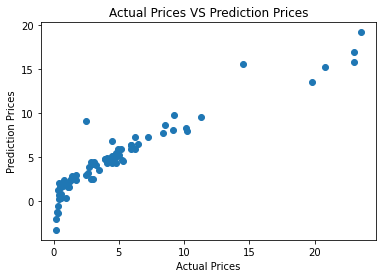

In [44]:
plt.scatter(y_test,y_pred_1)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()

2) Lasso Regression

In [45]:
y_pred_2 = lasso.predict(X_test)
y_pred_2

array([ 4.80741694,  4.52527963,  4.30226304,  1.4063877 ,  3.60865167,
        2.77223727,  2.25320836,  7.69482476,  2.04712681,  2.64358958,
        4.88166237,  5.95371868,  5.97759122,  4.40912885,  4.36957096,
        7.93546544,  4.40288039,  0.22705686,  2.41488517,  2.71561594,
        2.53631504,  4.94868996,  2.78889199,  2.98803604,  6.88075289,
        3.96600378,  3.49318994,  4.72692306,  1.36988984,  6.33813175,
        2.47025681,  1.27205219,  1.46300904,  4.88166237,  5.23901447,
        2.13524724,  3.64986798,  4.36957096,  4.35069718,  2.92669626,
        4.88263173, -1.786189  ,  3.49693902,  3.96600378,  1.91473003,
        8.29281754,  0.83795528, -0.62920069,  2.79361044,  3.09184182,
        4.88166237,  2.31926658,  2.47844401, 13.15628431,  5.15158308,
        9.38083952,  5.46175074, 14.21321592,  6.92946735,  7.57811334,
       -0.62920069, 13.85586381,  2.64358958,  5.23901447, 14.88948352,
        8.29281754,  9.49908096,  0.58440896,  8.29281754,  4.18

In [46]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_2})
df

,Actual,Prediction
270,4.10,4.807417
242,4.40,4.525280
280,5.25,4.302263
178,0.35,1.406388
204,2.75,3.608652
...,...,...
25,3.00,2.443476
63,23.50,18.485908
251,5.00,5.474937
91,11.25,8.753006


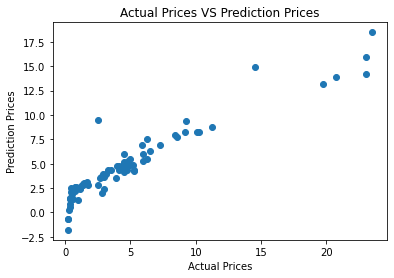

In [47]:
plt.scatter(y_test,y_pred_2)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()

**10) Evaluation Metrics**

1) Linear Regression

In [48]:
from sklearn import metrics
print("R2-Scores: ",metrics.r2_score(y_test,y_pred_1))

R2-Scores:  0.866615487254662


2) Lasso Regression

In [49]:
from sklearn import metrics
print("R2-Scores: ",metrics.r2_score(y_test,y_pred_2))

R2-Scores:  0.8331343823665679
